<a href="https://colab.research.google.com/github/victorknox/wordbeach/blob/main/wordcloudeng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install requests

# A) Corpus Collection


In [74]:
import requests
from bs4 import BeautifulSoup

# Used bash script to get a list of titles
# "Radioactive_decay","Space","Vacuum","Delisted_Thermodynamics","Heat","Temperature","Theory_of_relativity","Speed_of_light","Wave","Electromagnetic_radiation","Light","Color","Optics","Delisted_Sound","Biology","Life","Delisted_Cell","Death","Suicide","Abiogenesis","Evolution","Human_evolution","Failed_candidate_Natural_selection","Organism","Archaea","Bacteria","Eukaryote","Animal","Zoology","Amphibian","Arthropod","Delisted_Insect","Bird","Fish","Mammal","Former_Cat","Cattle","Dog","Horse","Primate","Former_Human","Rodent","Reptile","Dinosaur","Plant","Botany","Flower","Seed","Tree","Algae","Fungus","Virus","Anatomy","Human_body","Circulatory_system","Blood","Heart","Lung","Digestion","Liver","Immune_system","Skin","Muscle","Nervous_system","Brain","Ear","Eye","Sense","Skeleton","Ecology","Biodiversity","Ecosystem","Extinction","Genetics","DNA","Former_Gene","Heredity","RNA","Metabolism","Molecular_biology","Start-Class_article_Hormone","Protein","Paleontology","Photosynthesis","Reproduction","Sex","Pregnancy","Sleep","Taxonomy","Species","Chemistry","Biochemistry","Inorganic_chemistry","Organic_chemistry","Physical_chemistry","Chemical_element","Periodic_table","Aluminium","Carbon","Copper","Gold","Hydrogen","Iron","Nitrogen","Oxygen","Phosphorus","Silicon","Failed_candidate_Silver","Sulfur","Start-Class_article_Chemical_compound","Delisted_Water","Delisted_Carbon_dioxide","Chemical_bond","Molecule","Chemical_reaction","Acid–base_reaction","Catalysis","Redox","Metal","Alloy","Bronze","Steel","Earth_science","History_of_Earth","Atmosphere_of_Earth","Structure_of_Earth","Season","Flood","Climate_","Climate_change","Weather","Cloud","Rain","Snow","Tornado","Symbol_question.svg_Former_Tropical_cyclone","Wind","Geology","Earthquake","Erosion","Mineral","Former_Plate_tectonics","Rock","Soil","Delisted_Volcano"
url_list = ["Science","Scientific_method","Measurement","International_System_of_Units","Nature","Astronomy","Universe","Solar_System","Sun","Mercury","Venus","Earth","Moon","Mars","Former_Jupiter","Saturn","Uranus","Neptune","Delisted_Asteroid","Former_Big_Bang","Former_Black_hole","Former_Comet","Galaxy","Milky_Way","Natural_satellite","Orbit","Outer_space","Physical_cosmology","Planet","Star","Supernova","Delisted_Physics","Energy","Time","Day","Year","Classical_mechanics","Mass","Momentum","Motion","Newton's_laws_of_motion","Force","Electromagnetism","Gravity","Strong_interaction","Weak_interaction","Magnetism","Matter","State_of_matter","Former_Atom_","Particle_physics","Standard_Model","Subatomic_particle","Electron","Neutron","Former_Photon","Proton","Former_Quantum_mechanics",]
for i in url_list:
  url = "https://en.wikipedia.org/wiki/" + i
  print(i)
  # ping a website or portal for information
  res = requests.get(url)
  html_page = res.content

  soup = BeautifulSoup(html_page, 'html.parser')
  # Python library that is used for web scraping purposes to pull the data out of HTML and XML files
  text = soup.find_all(text=True)

  output = ''
  extractlist = [
      'p',
      'h1',
      'h2',
      'h3',
      'h4',
      'h5',
      'h6',
      'b',
      'a'
  ]

  for t in text:
      if t.parent.name in extractlist:
          output += '{} '.format(t)
    
  # print(output)
  f = open("text.txt", "a")
  f.write(output)
  f.close()

Science
Scientific_method
Measurement
International_System_of_Units
Nature
Astronomy
Universe
Solar_System
Sun
Mercury
Venus
Earth
Moon
Mars
Former_Jupiter
Saturn
Uranus
Neptune
Delisted_Asteroid
Former_Big_Bang
Former_Black_hole
Former_Comet
Galaxy
Milky_Way
Natural_satellite
Orbit
Outer_space
Physical_cosmology
Planet
Star
Supernova
Delisted_Physics
Energy
Time
Day
Year
Classical_mechanics
Mass
Momentum
Motion
Newton's_laws_of_motion
Force
Electromagnetism
Gravity
Strong_interaction
Weak_interaction
Magnetism
Matter
State_of_matter
Former_Atom_
Particle_physics
Standard_Model
Subatomic_particle
Electron
Neutron
Former_Photon
Proton
Former_Quantum_mechanics


## Counting the number of sentences


In [83]:
# Opening a file
file = open("text.txt","r")
Counter = 0
  
# Reading from file
Content = file.read()
CoList = Content.split(".")
  
for i in CoList:
    if i:
        Counter += 1
          
print("This is the number of lines in the file")
print(Counter)

This is the number of lines in the file
18379


## Cleaning the text


In [82]:
# cleaning text
import re
# x = re.sub("[^ A-Za-z]", "", x)

x = Content.lower()
# Remove unicode characters
x = x.encode('ascii', 'ignore').decode()
# Remove mentions
x = re.sub("@\S+", " ", x)
# Remove URL
x = re.sub("https*\S+", " ", x)
# Remove Hashtags
x = re.sub("#\S+", " ", x)
# Remove ticks and the next character
x = re.sub("\'\w+", '', x)
# Remove punctuations
# x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
# Remove numbers
x = re.sub(r'\w*\d+\w*', '', x)
# Replace the over spaces
x = re.sub('\s{2,}', " ", x)
# print(x)
x = x.encode('ascii', 'ignore').decode()
x = re.sub(r'https*\S+', ' ', x)
x = re.sub(r'@\S+', ' ', x)
x = re.sub(r'#\S+', ' ', x)
x = re.sub(r'\'\w+', '', x)
# x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
x = re.sub(r'\w*\d+\w*', '', x)
x = re.sub(r'\s{2,}', ' ', x)
my_punct = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',',
           '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', 
           '`', '{', '|', '}', '~', '»', '«', '“', '”']

punct_pattern = re.compile("[" + re.escape("".join(my_punct)) + "]")
x = re.sub(punct_pattern, "", x)
f = open("text.txt", "w")
f.write(x)
f.close()

# print(Content)
# output= re.sub("\n","",output)
# output= re.sub(",","",output)
# output= re.sub("[A-Za-z0-9]","",output)
# output= re.sub('[\W_]+', '', output)
# output= re.sub("[^ ]", '', output)


# B) NLTK Operations

In [85]:
!pip install nltk
import nltk


nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization(Sentences,Tokens)

In [86]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
print(sent_tokenize(x))
print(word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['former quantum mechanics jump to navigation jump to search former quantum mechanics sister projects wiktionary wikibooks wikiquote wikisource wikiversity commons wikivoyage wikinews wikidata wikispecies wikipedia does not have an article with this exact name search for in wikipedia log in or create an account autoconfirmed article wizard add a request for it search for look for pages within wikipedia that link to this title other reasons this message may be displayed try the purge function case sensitive check alternative capitalizations redirect check the deletion log why was the page i created deleted navigation menu talk contributions create account log in article talk main page contents current events random article about wikipedia contact us donate help learn to edit community portal recent changes upload file what links here upload file special pages printable version 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## POS tagging

## Remove Stopwords

## Stemming and Lemmatization

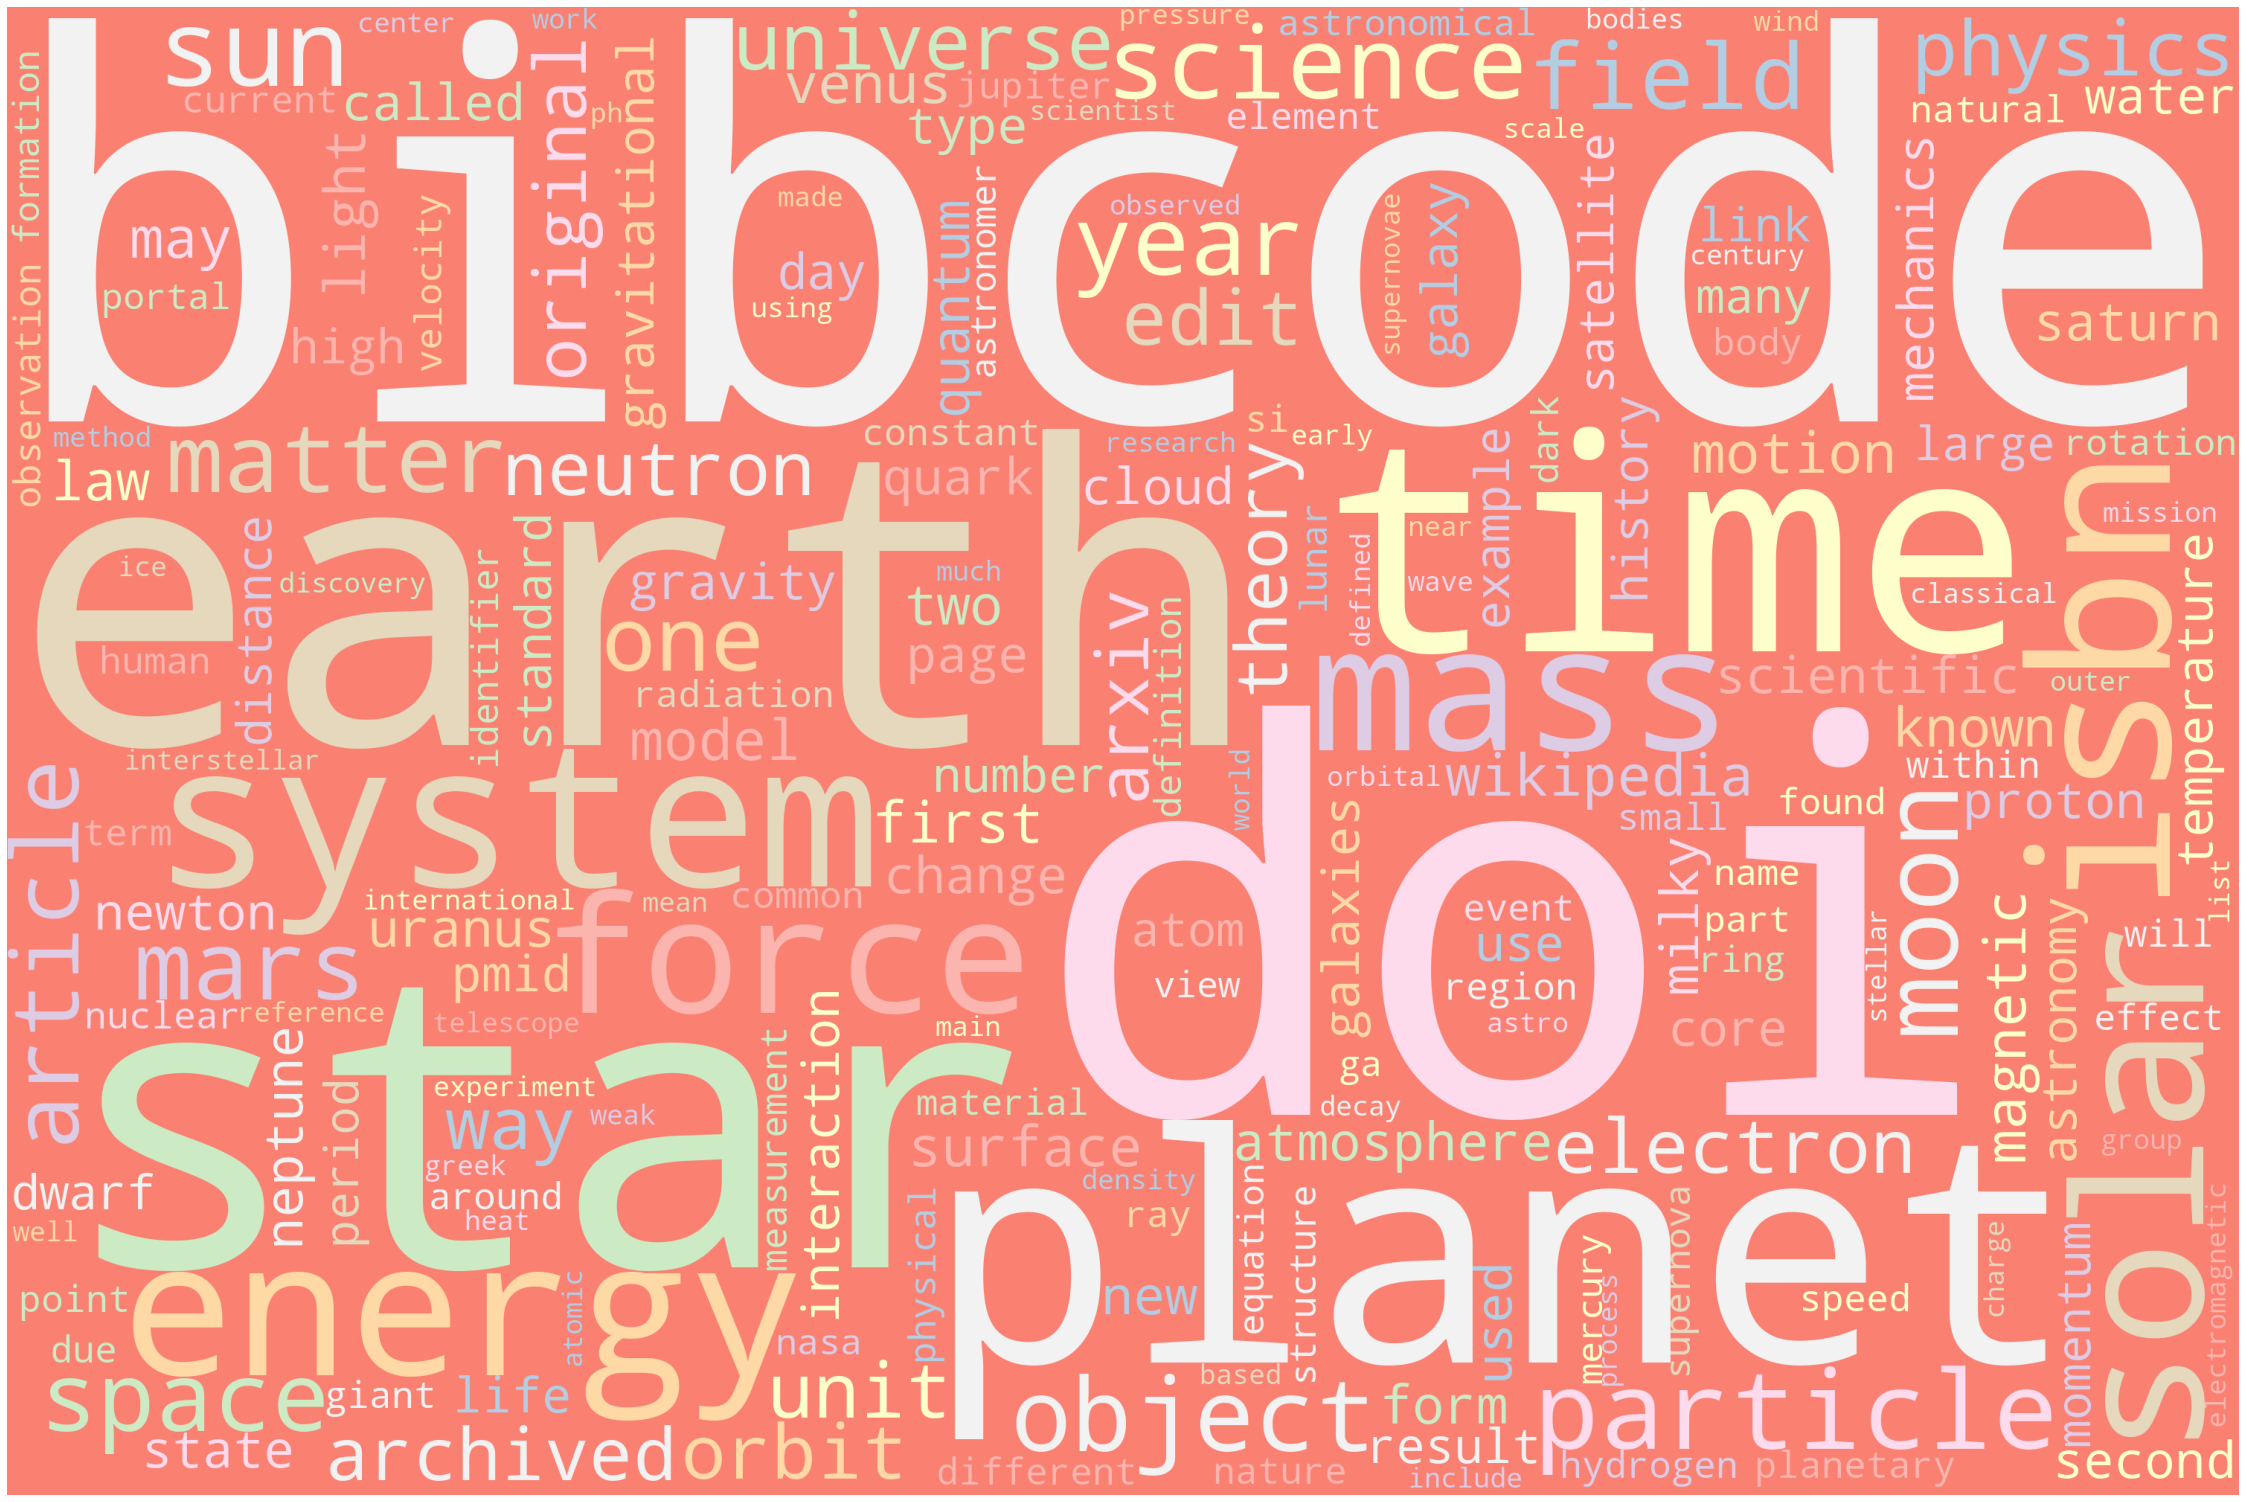

In [88]:
# Word Cloud
# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
  # Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(x)
# Plot
plot_cloud(wordcloud)